<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [2]:
import numpy as np

In [3]:
print(np.float32(12.123452) - np.float32(12.123450))
diff = np.float32(12.123452) - np.float32(12.123450)
valor_real = 0.000002

error = abs(diff-valor_real)/valor_real*100

#(12.123452/valor_real)*1/(2**31)

print(error)

1.9073486e-06
4.632568359374996


In [4]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [5]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [6]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [7]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [8]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [9]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [10]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [11]:
# Definimos la funcion que calcula el valor de la serie hasta un N dado
def exponencial(x,N):
  exp = 0
  for i in range(N):
    exp += (-1)**i * ( (x**i) / (factorial(i)) )

  return exp

In [12]:
# Hacemos la comparacion del valor dado por nuestra funcion con la que consideraremos el valor exacto
x = 0.1
N = 100
e1 = exponencial(x,N)
e_exacto = np.exp(-x)

print(e1)
print(e_exacto)

0.9048374180359596
0.9048374180359595


In [13]:
# Hacemos una funcion que calcule el N en el cual la serie se trunca
def exponencial_truncado(X,N):
  ex = exponencial(x,N)
  tresh = abs(1e-7*ex)
  for i in range(N):
    exp_ = abs(((-x)**(i+1)) / (factorial(i+1)))
    if exp_ <= tresh:
      break
  exp = exponencial(x,i)
  return exp, i

In [14]:
# Comparamos los valores obtenidos con el valor exacto y vemos el valor de N en que se trunca la serie
x = 0.1
N = 100
exacto = np.exp(-x)

print(f'Valor de la serie: {exponencial(x,N)}')
print(f'Valor de la serie truncada y valor en que se trunca: {exponencial_truncado(x,N)}')
print(f'Valor exacto: {exacto}')

Valor de la serie: 0.9048374180359596
Valor de la serie truncada y valor en que se trunca: (0.9048333333333334, 4)
Valor exacto: 0.9048374180359595


In [15]:
# Probamos para x = 5
x = 5
N = 100
exacto = np.exp(-x)

print(f'Valor de la serie: {exponencial(x,N)}')
print(f'Valor de la serie truncada: {exponencial_truncado(x,N)}')
print(f'Valor exacto: {exacto}')

Valor de la serie: 0.006737946999086907
Valor de la serie truncada: (0.006737947579184599, 27)
Valor exacto: 0.006737946999085467


In [16]:
# Ahora para x = 15 y N = 1000
x = 15
N = 1000
exacto = np.exp(-x)

print(f'Valor de la serie: {exponencial(x,N)}')
print(f'Valor de la serie truncada: {exponencial_truncado(x,N)}')
print(f'Valor exacto: {exacto}')

Valor de la serie: 3.0593423664124836e-07
Valor de la serie truncada: (3.05934287319534e-07, 63)
Valor exacto: 3.059023205018258e-07


In [17]:
# Creamos una funcion que calcule la misma serie pero calculando primero la serie para e^x, y haciendo 1/e^x
def invertida(x,N):
  exp = 0
  for i in range(N):
    exp += x**i / factorial(i)
  return 1/exp

In [18]:
# Probamos para x = 50 y N = 1000
x = 50
N = 1000
exacto = np.exp(-x)

print(f'Valor de la serie: {exponencial(x,N)}')
print(f'Valor de la serie invertida: {invertida(x,N)}')
print(f'Valor exacto: {exacto}')

Valor de la serie: -7015.776232597128
Valor de la serie invertida: 1.9287498479639164e-22
Valor exacto: 1.9287498479639178e-22


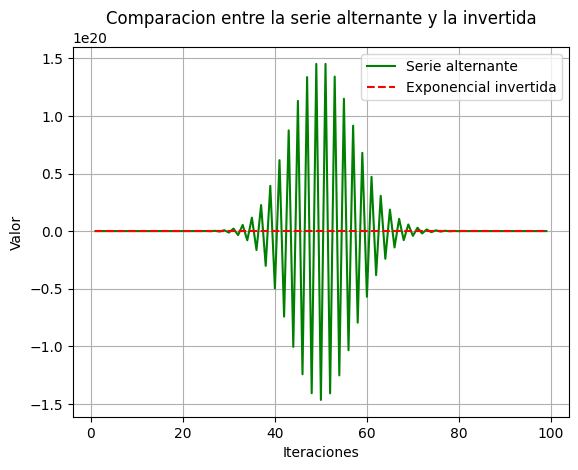

In [19]:
# Graficamos la comparacion entre la serie normal y la invertida para ver en que valores no convergen
N = np.arange(1,100,1)
x = 50
exp1 = np.zeros(len(N))
exp2 = np.zeros(len(N))

for i,n in enumerate(N):
  exp1[i] = exponencial(x,n)
  exp2[i] = invertida(x,n)

plt.title('Comparacion entre la serie alternante y la invertida')
plt.plot(N, exp1, 'g-', label = 'Serie alternante')
plt.plot(N, exp2, 'r--', label = 'Exponencial invertida')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.legend()
plt.grid()

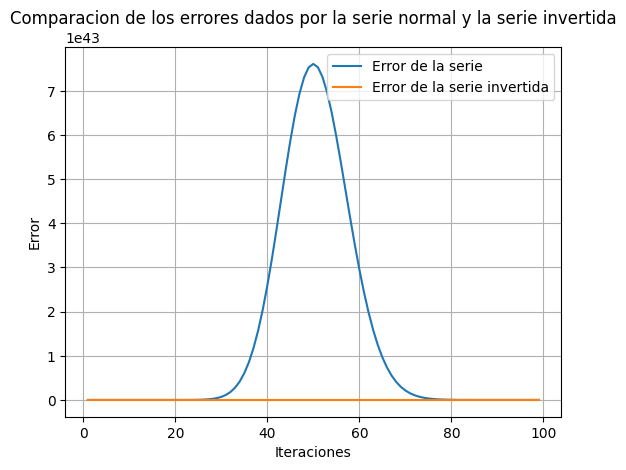

In [20]:
# Ahora miramos el comportamiento del error dado por cada serie para x = 50 y 0<N<100
x = 50
N = np.arange(1,100,1)

for i,n in enumerate(N):
  exp1[i] = exponencial(x,n)
  exp2[i] = invertida(x,n)


exacto = np.exp(-x)
error1 = abs(exp1- exacto) / exacto * 100
error2 = abs(exp2 - exacto) /exacto * 100

plt.title('Comparacion de los errores dados por la serie normal y la serie invertida')
plt.plot(N,error1, label = 'Error de la serie')
plt.plot(N,error2, label = 'Error de la serie invertida')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.legend()
plt.grid()

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [21]:
# Definimos las funciones que calcularan cada una de las series
def SN1(N):
  s = 0
  for i in range(1, 2*N+1):
    s += ( (-1)**i ) * ( i / (i + 1) )

  return s

def SN2(N):
  n = 0
  p = 0

  for i in range(1,N+1):
    n += ( (2*i) - 1) / (2*i)
    p += (2*i) / (2*i + 1)

  return p-n

def SN3(N):
  s = 0

  for i in range(1,N+1):
    s += 1 / ( (2*i) * ( (2*i) + 1) )

  return s

In [22]:
# Vemos la convergencia de cada serie para N = 10000
N = 10000

print(SN1(N))
print(SN2(N))
print(SN3(N))

0.30682782131491515
0.30682782129770203
0.3068278213149313


In [23]:
# Definimos funciones que nos calculen el valor en el cual se trunca cada serie para un N dado
def SN1_truncada(N):
  S = SN1(N)
  tresh = abs(1e-7*S)

  for i in range(1,2*N+1):
    r = abs( (-1)**(i+1) ) * ( (i+1) / (i + 2) )

    if r <= tresh:
      break

  SN = SN1(i)

  return SN, i

def SN2_truncada(N):
  S = SN2(N)
  tresh = abs(1e-7*S)
  n = 0
  p = 0

  for i in range(1, N+1):
    n += (2*(i+1) - 1) / (2*(i+1))
    p += (2*(i+1) / (2*(i+1) + 1))

    r = abs(p-n)

    if r <= tresh:
      break

  SN = SN2(i)
  return SN, i

def SN3_truncada(N):
  S = SN3(N)
  tresh = abs(1e-7*S)
  for i in range(1, N+1):
    r = abs( 1 / ( (2*(i+1)) * ( (2*(i+1)) + 1) ) )
    if r <= tresh:
      break
  SN = SN3(i)
  return SN, i

In [24]:
# Comparamos cada serie, viendo cual de ellas es mas exacta
N = 100000

print(f'Valor de la serie SN1 truncada e iteracciones necesitadas {SN1_truncada(N)}')
print(f'Valor de la serie SN2 truncada e iteracciones necesitadas {SN2_truncada(N)}')
print(f'Valor de la serie SN3 truncada e iteracciones necesitadas {SN3_truncada(N)}')

Valor de la serie SN1 truncada e iteracciones necesitadas (0.3068515694446865, 200000)
Valor de la serie SN2 truncada e iteracciones necesitadas (0.3068503183021676, 100000)
Valor de la serie SN3 truncada e iteracciones necesitadas (0.30676524609805284, 2854)


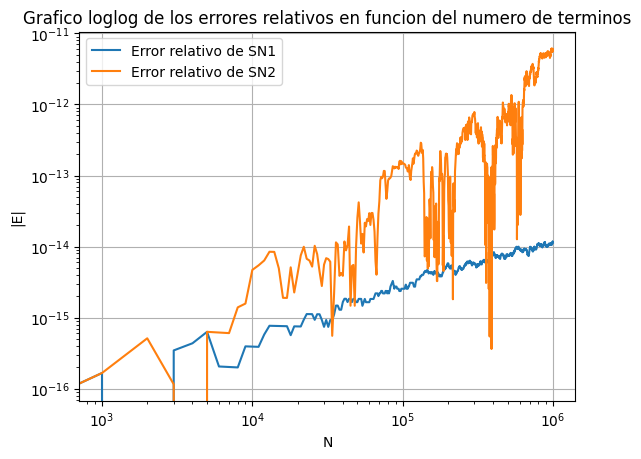

In [87]:
# Consideramos a SN3 la solucion exacta
N = np.linspace(0, 1e6, 1000)

E1 = np.zeros_like(N)
E2 = np.zeros_like(N)

# Calculo de E1
for i in range(1,len(N)):
  E1[i] = abs((SN1(i) - SN3(i)) / SN3(i))

# Calculo de E2
for i in range(1,len(N)):
  E2[i] = abs((SN2(i) - SN3(i)) / SN3(i))

plt.title('Grafico loglog de los errores relativos en funcion del numero de terminos')
plt.loglog(N, E1,  label = 'Error relativo de SN1')
plt.loglog(N, E2,  label = 'Error relativo de SN2')
plt.xlabel('N')
plt.ylabel('|E|')
plt.legend()
plt.grid()

Como podemos ver, las gráficas de los errores concuerdan con lo expuesto en el libro. Estas presentan primeramente un decrecimiento y comienzan a variar suavemente en una región. En esta región, la serie converge, pero a medida que aumenta N, el error de ambas aumenta, por lo que la precisión del cálculo es menor.